<a href="https://colab.research.google.com/github/Izuho/computer-graphics/blob/main/9-21/RBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

import distutils
if distutils.version.LooseVersion(tf.__version__) <= '2.0':
    raise Exception('This notebook is compatible with TensorFlow 1.14 or higher, for TensorFlow 1.13 or lower please use the previous version at https://github.com/tensorflow/tpu/blob/r1.13/tools/colab/fashion_mnist.ipynb')

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print('学習用写真 : ', x_train.shape, '\n学習用ラベル : ', y_train.shape, '\nテスト用写真 : ', x_test.shape, '\nテスト用ラベル : ', y_test.shape)

学習用写真 :  (60000, 28, 28) 
学習用ラベル :  (60000,) 
テスト用写真 :  (10000, 28, 28) 
テスト用ラベル :  (10000,)


In [ ]:
import numpy as np
import time

class RBM:

    def __init__(self, n_v, n_h):

        self.w = np.random.randn(n_h, n_v)
        self.b = np.random.randn(n_h, 1)
        self.a = np.random.randn(n_v, 1)
        self.err = []

    def train(self, V, epsilon, epoch, T):
        for epo in range(epoch):
            start = time.time()
            for (n, v_0) in enumerate(V):
                v_0 = np.copy(v_0).reshape(-1, 1)
                p_h_0 = np.copy(self.sigmoid(self.w.dot(v_0) + self.b))

                v, p_h = self.encode_decode(np.copy(v_0), T)
                self.update(v_0, v, p_h_0, p_h, epsilon)
            error = np.mean(np.abs(v_0 - v))
            self.err.append(error)
            print(epo, ' epochs : ', time.time() - start, ' sec\n        diff : ', error)

    def encode_decode(self, v, T):
        for t in range(T):
            # visible
            p_h = self.sigmoid(self.w.dot(v) + self.b)
            h = (np.random.rand(n_h, 1) < p_h).astype('float64')

            # hidden
            p_v = self.sigmoid(self.w.T.dot(h) + self.a)
            v = (np.random.rand(n_v, 1) < p_v).astype('float64')

        return (v, p_h)

    def update(self, v_0, v, p_h_0, p_h, epsilon):
        self.w += epsilon * (v_0.T * p_h_0 - v.T * p_h)
        self.a += epsilon * (v_0 - v)
        self.b += epsilon * (p_h_0 - p_h)

    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))


if __name__ == "__main__":
    # init parameters
    N = 60000
    side = 28
    n_v = side ** 2
    n_h = 100
    T = 1
    x_train_flat = x_train.reshape(-1, n_v)
    x_test_flat = np.where(x_train_flat <= 0.5, 0.0, 1.0)
    # train
    rbm = RBM(n_v, n_h)
    rbm.train(x_train, 0.1, 200, T)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in exp


0  epochs :  28.89368987083435  sec
        diff :  0.2768157262905162
1  epochs :  30.191098928451538  sec
        diff :  0.13104741896758704
2  epochs :  27.823135137557983  sec
        diff :  0.14612845138055222
3  epochs :  44.95820426940918  sec
        diff :  0.3206732693077231
4  epochs :  29.61011266708374  sec
        diff :  0.3225640256102441
5  epochs :  28.007046937942505  sec
        diff :  0.2993347338935574
6  epochs :  27.97175931930542  sec
        diff :  0.28652961184473785
7  epochs :  27.894603490829468  sec
        diff :  0.31147458983593435
8  epochs :  27.968143701553345  sec
        diff :  0.30645258103241296
9  epochs :  27.927820444107056  sec
        diff :  0.29801420568227294
10  epochs :  28.049454927444458  sec
        diff :  0.3046468587434974
11  epochs :  27.915213108062744  sec
        diff :  0.2876650660264105
12  epochs :  28.0210919380188  sec
        diff :  0.31273509403761507
13  epochs :  28.10872483253479  sec
        diff :  0.30633

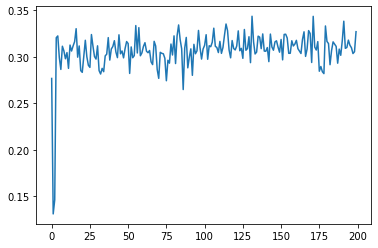

In [ ]:
import matplotlib.pyplot as plt

plt.plot(rbm.err)

In [ ]:
x_test = np.where(x_test <= 0.5, 0.0, 1.0)
x_test_flat = x_test_flat.reshape(-1, n_v)
decoded_imgs_flat, _ = rbm.encode_decode(x_test_flat, T)
decoded_imgs = decoded_imgs_flat.reshape(-1, side, side)

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()